<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

# Introduction

Vous disposez de plusieurs jeux de données contenant pour des jours différents les coordonnées géographiques de lieux où ont eu lieu des accidents de la route. Votre tâche est de regrouper les accidents en clusters pour identifer des zones géographiques où le risque d'accident est le plus élevé.


# Données

Les fichiers contenant les données se situent dans deux dossiers nommés **`"case_1"`** et **`"case_2"`**. Chaque dossier sera traité indépendamment.

Dans chaque fichier, vous aurez deux colonnes `"0"` et `"1"` contenant les latitudes et longitudes du lieu de l'accident.


# Objectif

En vous aidant de cette [fiche](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html), utilisez la méthode qui vous convient pour récupérer les **`centroïdes`** des accidents.

On appelle centroïde ou centre de gravité la position centrale d'un cluster. **Le centroïde est calculé en faisant la moyenne des vecteurs au sein d'un cluster.**

![centroids](centroids.png)


En utilisant les techniques de clustering de scikit-learn, vous devrez nous remettre un fichier csv contenant **les coordonnées des centroïdes** que vous aurez calculés pour chacun des cas (**Case 1** et/ou **Case 2**) où **la première colonne contient les abscisses et la seconde colonne les ordonnées des centroïdes.** Par exemple:

|     | **0** | **1**|
|-----|-------|------|
|**0**| 0.2131| -0.11|
|**1**| 0.54  | 0.44 |
|**2**| -1.1  | -0.9 |
| ... | ...   | ...  |


**10 centroïdes sont attendus pour le "Case 1". 100 centroïdes sont attendus pour le "Case 2".**

**À vous de jouer!**

### Exemple: Case 0


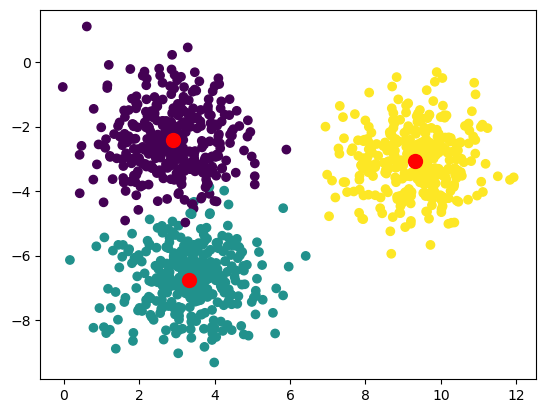

In [15]:
import matplotlib.pyplot as plt # visualisation de données

from sklearn import datasets # simulation de données

from sklearn.cluster import KMeans # modèle de clustering

# On simule des clusters. X contient les coordonnées des points et y le cluster auquel le point doit être rattaché.
X, y = datasets.make_blobs(n_samples = 1000, random_state = 30)

# Visualisation des clusters
plt.scatter(
    X[:, 0], # coordonnées x des points
    X[:, 1], # coordonnées y des points
    c = y   # on colore les points en fonction du cluster auquel ils appartiennent
)

# On entraîne un modèle KMeans pour regrouper les données en 3 clusters
clustering_model = KMeans(n_clusters = 3)
clustering_model.fit(X)

# On récupère les centroïdes des clusters identifiés par le KMeans
centroids = clustering_model.cluster_centers_

# Visualisation des centroïdes
plt.scatter(centroids[:, 0], # coordonnées x
            centroids[:, 1], # coordonnées y
            c = "red", # couleur
            s = 100) # taille des points

# Case 1

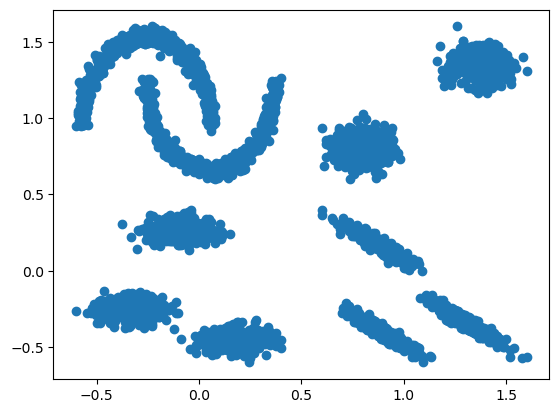

In [20]:
import glob # permet de rechercher des fichiers et des répertoires correspondant à un motif spécifié
import pandas as pd

# Récupération des fichiers csv contenus dans le dossier "case_1"
files = glob.glob("case_1/*.csv")

# On importe toutes les données contenues dans ces fichiers
dataframes = [pd.read_csv(file) for file in files]

# On regroupe la liste de DataFrames dans un unique DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Visualisation des données
plt.scatter(df["0"], df["1"])